<a href="https://colab.research.google.com/github/ZahidFaiz/CSMRI_CyclicGANs/blob/master/CGAN_scratch_predict%2Bregularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-gbc6z56o
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-gbc6z56o
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=783a3be8668297589786996fbe63e0f4510073ae0c825016c013e88fe8debd4a
  Stored in directory: /tmp/pip-ephem-wheel-cache-b18d88zz/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install gdown

In [0]:
import gdown

In [0]:
!gdown "https://drive.google.com/uc?export=download&id=1-608mHVC0tZ4QMP3yC5Jt1z-PJjiiEpd"
!gdown "https://drive.google.com/uc?export=download&id=1-ALbI3pKlN1ixLfhPutOoGy5tURr6Our"
!gdown "https://drive.google.com/uc?export=download&id=1-EALCjFNl6dEyidVfvmwkvbsloN_OEAb"
!gdown "https://drive.google.com/uc?export=download&id=1oZFg59nqNNKL_OpUaYBDyqPkRRk7z-VR"


Downloading...
From: https://drive.google.com/uc?export=download&id=1-608mHVC0tZ4QMP3yC5Jt1z-PJjiiEpd
To: /content/IXI023-Guys-0699-T1.nii.gz
6.50MB [00:00, 30.4MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-ALbI3pKlN1ixLfhPutOoGy5tURr6Our
To: /content/IXI035-IOP-0873-T1.nii.gz
11.6MB [00:00, 54.0MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-EALCjFNl6dEyidVfvmwkvbsloN_OEAb
To: /content/IXI058-Guys-0726-T1.nii.gz
8.58MB [00:00, 40.0MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1oZFg59nqNNKL_OpUaYBDyqPkRRk7z-VR
To: /content/model_GANs.h5
120MB [00:01, 62.7MB/s]


In [0]:
!gdown "https://drive.google.com/uc?export=download&id=12YUtH-uHVwVnJ2ZaaqKASX0KDfbulM1U"

Downloading...
From: https://drive.google.com/uc?export=download&id=12YUtH-uHVwVnJ2ZaaqKASX0KDfbulM1U
To: /content/mask-20200526T100015Z-001.zip
100% 250k/250k [00:00<00:00, 75.6MB/s]


In [0]:
!unzip "/content/mask-20200526T100015Z-001.zip"

Archive:  /content/mask-20200526T100015Z-001.zip
   creating: mask/ckpt-5_temp_b5ce69a9f27c4f78b1cec00955192697/
   creating: mask/.ipynb_checkpoints/
  inflating: mask/gauss_90.tif       
  inflating: mask/cartes_40.tif      
  inflating: mask/gauss_60.tif       
  inflating: mask/cartes_60.tif      
  inflating: mask/gauss_40.tif       
  inflating: mask/gauss_30.tif       
  inflating: mask/checkpoint         
  inflating: mask/ckpt-3.index       
  inflating: mask/gauss_20.tif       
  inflating: mask/ckpt-3.data-00000-of-00002  
  inflating: mask/gauss_70.tif       
  inflating: mask/cartes_30.tif      
  inflating: mask/cartes_70.tif      
  inflating: mask/ckpt-4.index       
  inflating: mask/gauss_50.tif       
  inflating: mask/ckpt-4.data-00000-of-00002  
  inflating: mask/gauss_10.tif       
  inflating: mask/gauss_80.tif       
  inflating: mask/ckpt-5.index       
  inflating: mask/ckpt-5.data-00000-of-00002  
  inflating: mask/cartes_90.tif      
  inflating: mask/ckpt-1

In [0]:
!mkdir testdata

In [0]:
!mv "/content/IXI023-Guys-0699-T1.nii.gz" "/content/testdata"
!mv "/content/IXI035-IOP-0873-T1.nii.gz" "/content/testdata"
!mv "/content/IXI058-Guys-0726-T1.nii.gz" "/content/testdata"


mv: cannot stat '/content/IXI023-Guys-0699-T1.nii.gz': No such file or directory


In [0]:
# example of defining composite models for training cyclegan generators
import keras
from keras.optimizers import Adam
from keras.models import Model
from keras.models import Sequential
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose, Add
from keras.layers import Activation, BatchNormalization
from keras.layers import LeakyReLU
from keras.initializers import RandomNormal
from keras.layers import Concatenate
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from keras.layers import Deconvolution2D
from keras.losses import BinaryCrossentropy
from keras.layers import Dropout

In [0]:
# # #getting the testset 4.5gb
# !wget http://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI-T1.tar
# import shutil
# !mkdir test
# shutil.unpack_archive('/content/IXI-T1.tar', '/content/test')

In [0]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
import nibabel as nib

In [0]:
masks = []
for msk in glob.glob('/content/mask/*.tif'):
  temp = plt.imread(msk)
  masks.append(temp)
masks = np.array(masks)

In [0]:
def complex_to2channel(image): 
  real = tf.math.real(image)
  imaginary = tf.math.imag(image)
  real = tf.reshape(real , [256, 256, 1])
  imag = tf.reshape(imaginary, [256, 256, 1]) 
  return tf.concat([real, real ,real], axis = -1).numpy()

In [0]:
def preprocess(image, masks): 
  mask = masks[np.random.randint(19, size = 1), : , :]
  DEFAULT_MAKS_TF = tf.cast(tf.constant(mask[0]), tf.float32)
  DEFAULT_MAKS_TF_c = tf.cast(DEFAULT_MAKS_TF, tf.complex64)
  image = tf.cast(image, tf.float64)/255
  kspace_input = tf.signal.fft2d(tf.cast(image, tf.complex64))
  padded = kspace_input*DEFAULT_MAKS_TF_c
  image_undersampled = tf.signal.ifft2d(padded)
  image_unsampled = tf.signal.ifft2d(kspace_input)
  label = complex_to2channel(image_unsampled)
  feature = complex_to2channel(image_undersampled)
  return label, feature

In [0]:
def generate_images(model, test_input , labels):
  test_input = np.expand_dims(test_input , axis = 0 )
  labels = np.expand_dims(labels , axis = 0)
  prediction = model.predict(test_input)
    
  plt.figure(figsize=(12, 12))

  display_list = [test_input[0, : , :  , 0], prediction[ 0 , : , : , 0 ] , labels[ 0 , : , : , 0 ]]
  title = ['Input Image', 'Predicted Image', 'Dataset_img']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5 , cmap = 'gray')
    plt.axis('off')
  plt.show()

In [0]:
def generate_test_images(model, test_input , labels):
  test_input = np.expand_dims(test_input , axis = 0 )
  labels = np.expand_dims(labels , axis = 0)
  prediction = model.predict(test_input)
    
  plt.figure(figsize=(12, 12))

  display_list = [ prediction[ 0 , : , : , 0 ] , labels[ 0 , : , : , 0 ]]
  title = [ 'Predicted Image', 'Dataset_img']

  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5 , cmap = 'gray')
    plt.axis('off')
  plt.show()

In [0]:
# j = 0 
# for X, y in np.array(list(zip(np.array(features),np.array(labels)))):
#   generate_images(g_model_AtoB,  X, y)
#   if i == 70: 
#     break 
#   i+=1 

In [0]:
from keras.models import load_model

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


/content/testdata/IXI035-IOP-0873-T1.nii.gz


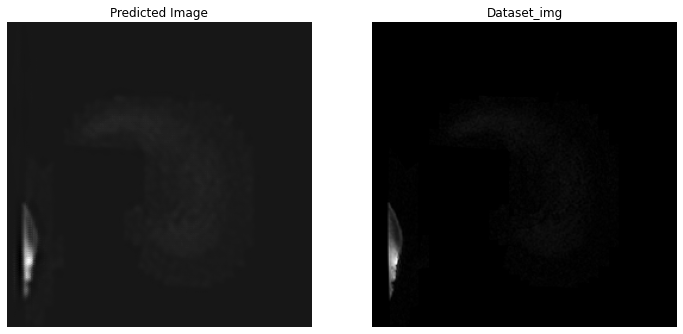

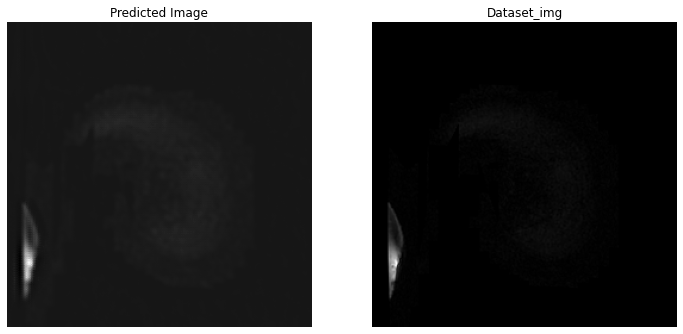

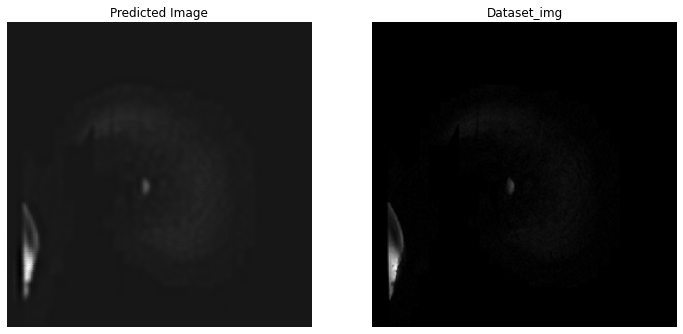

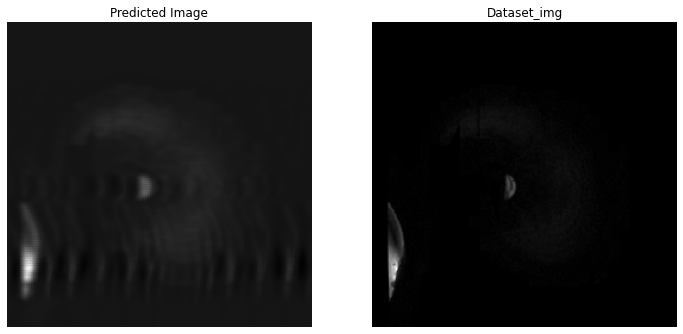

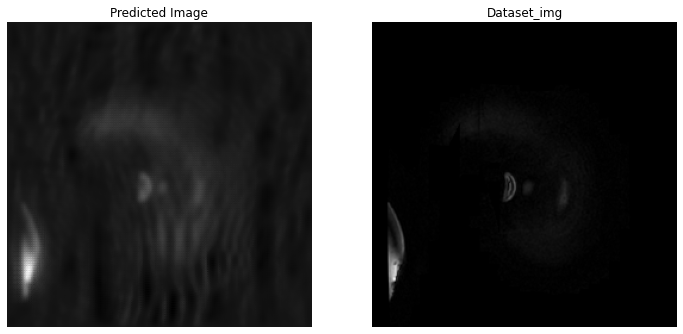

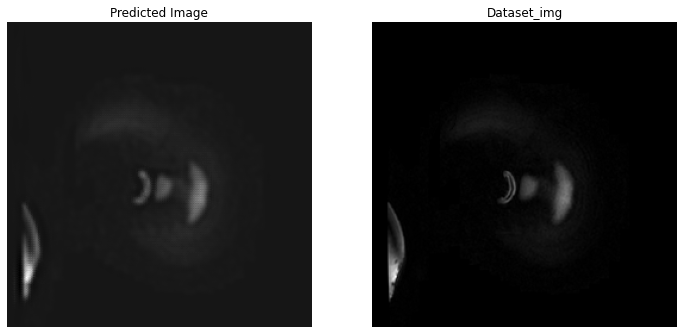

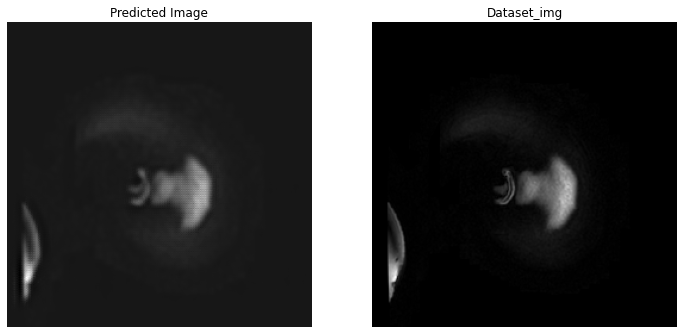

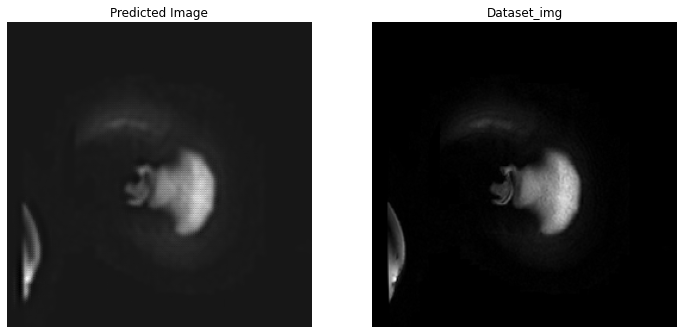

/content/testdata/IXI058-Guys-0726-T1.nii.gz
/content/testdata/IXI023-Guys-0699-T1.nii.gz


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


/content/testdata/IXI035-IOP-0873-T1.nii.gz


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


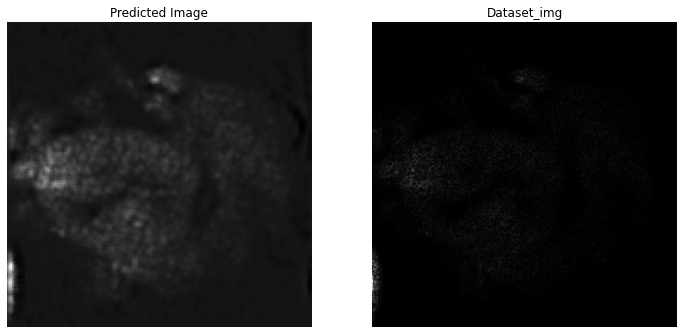

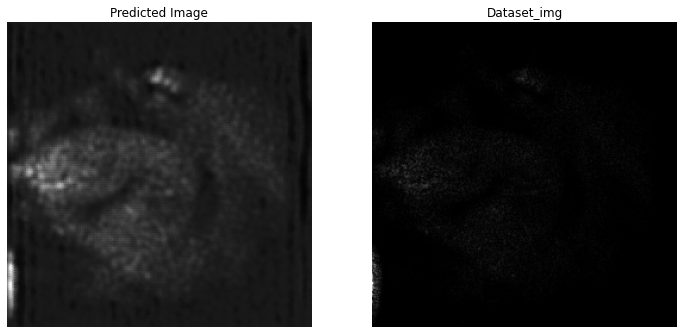

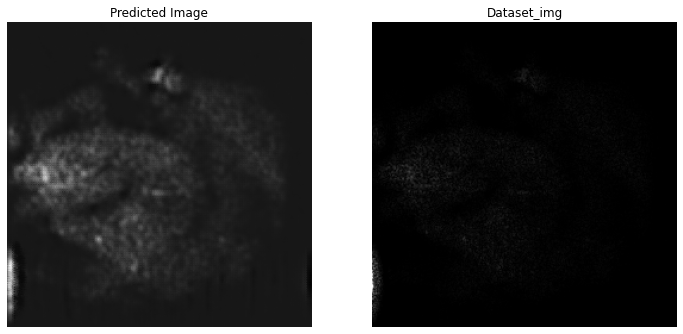

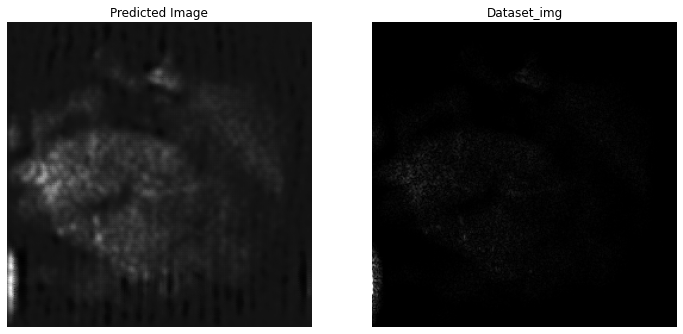

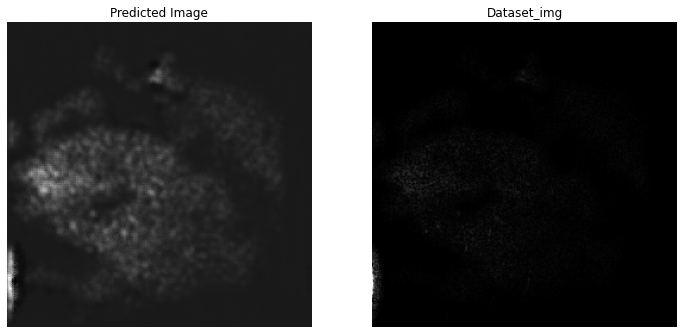

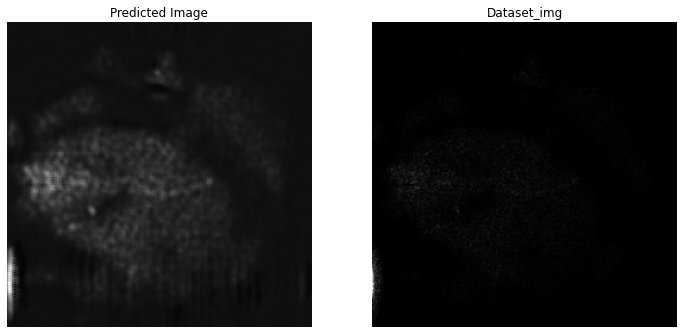

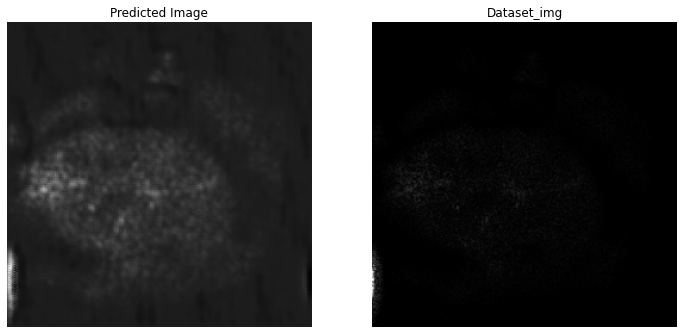

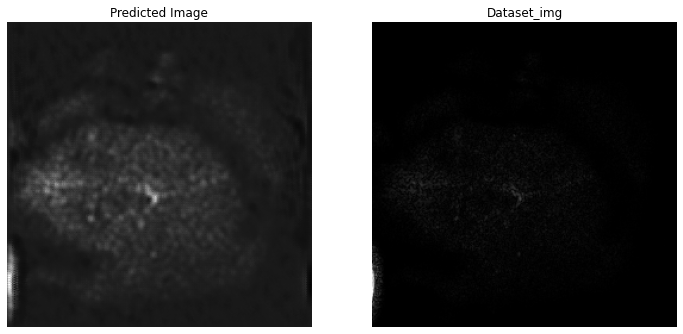

/content/testdata/IXI058-Guys-0726-T1.nii.gz
/content/testdata/IXI023-Guys-0699-T1.nii.gz


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


/content/testdata/IXI035-IOP-0873-T1.nii.gz


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


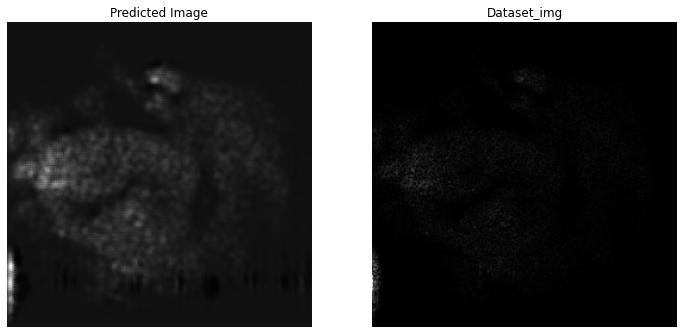

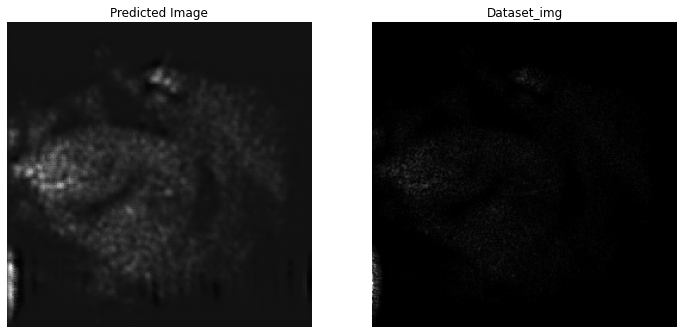

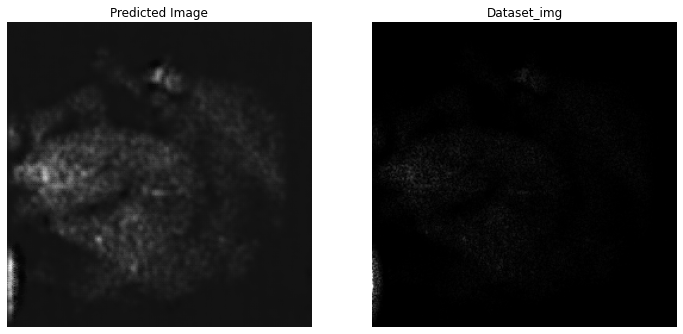

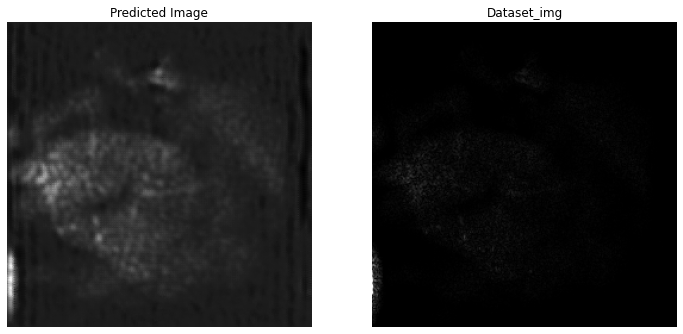

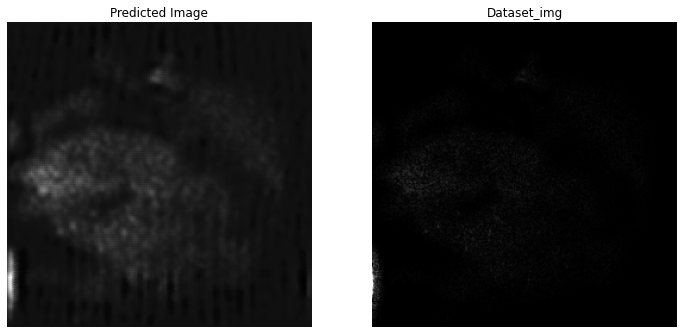

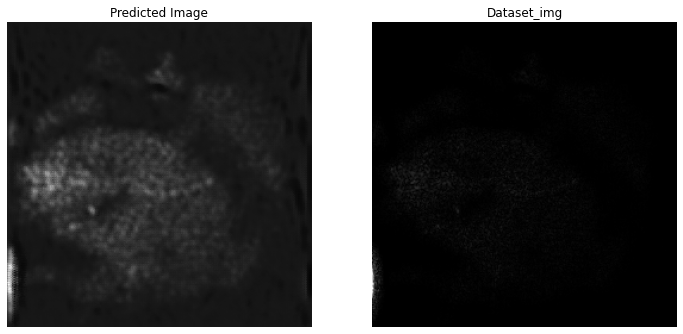

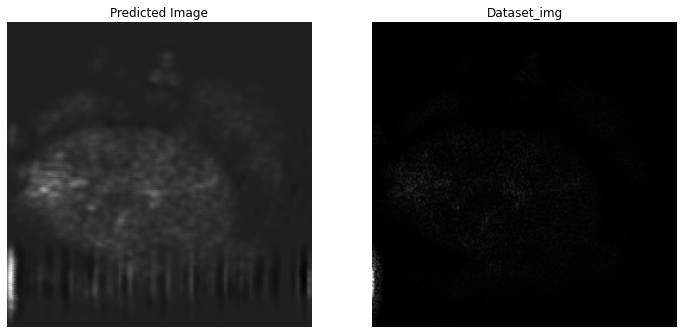

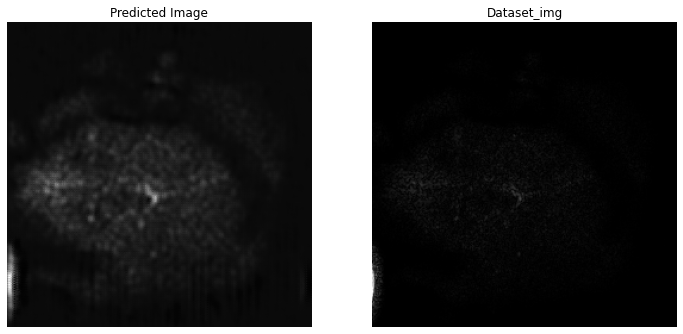

/content/testdata/IXI058-Guys-0726-T1.nii.gz
/content/testdata/IXI023-Guys-0699-T1.nii.gz


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


/content/testdata/IXI035-IOP-0873-T1.nii.gz


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


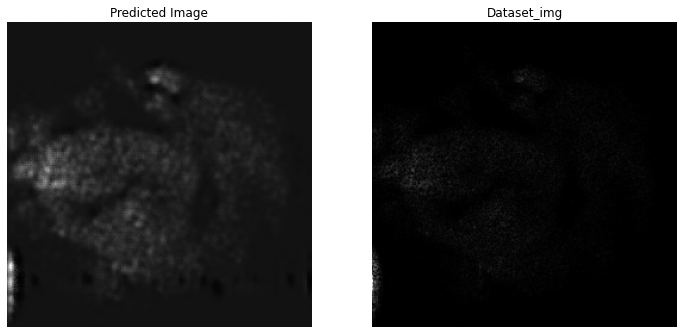

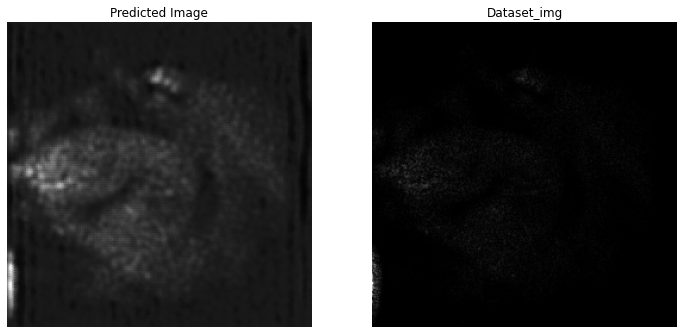

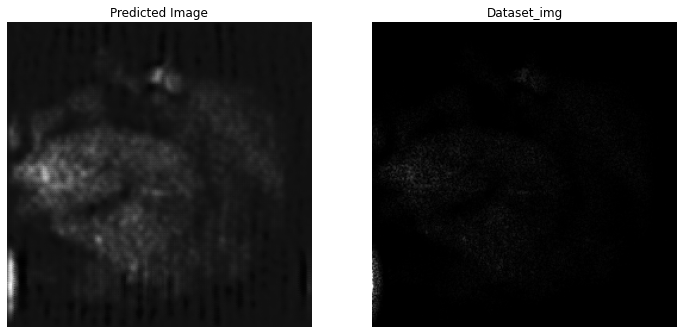

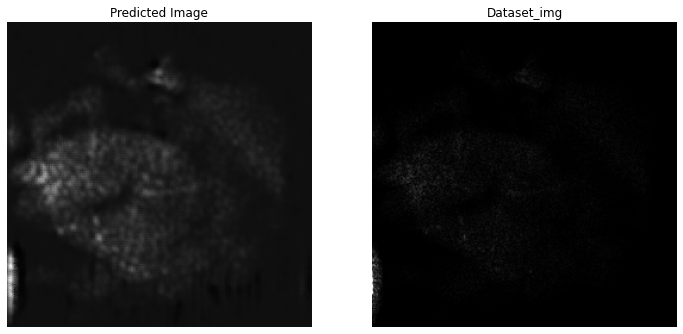

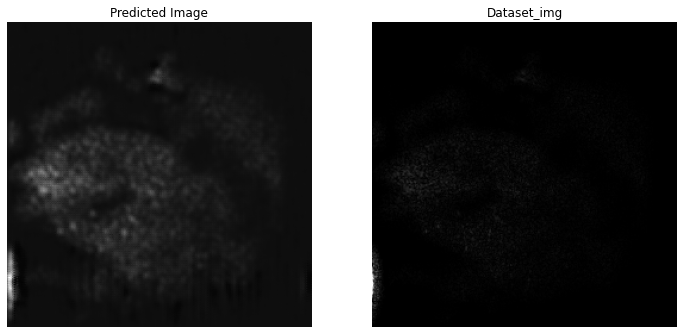

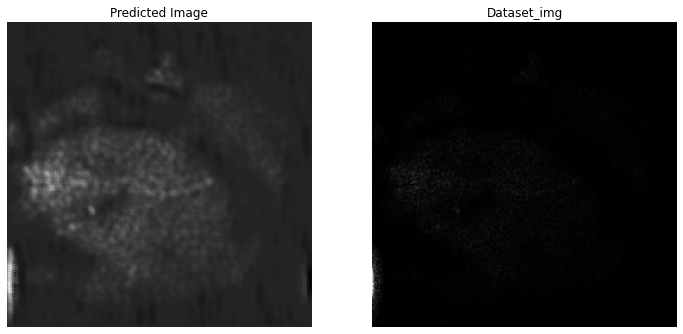

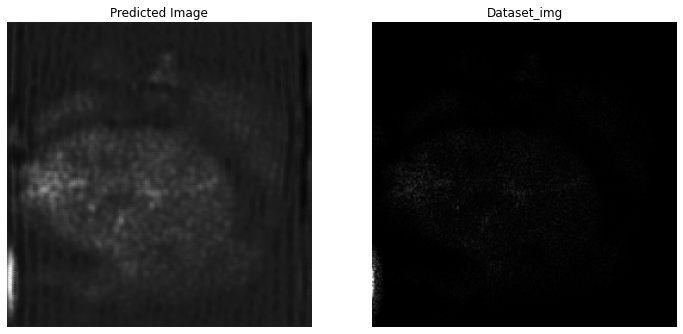

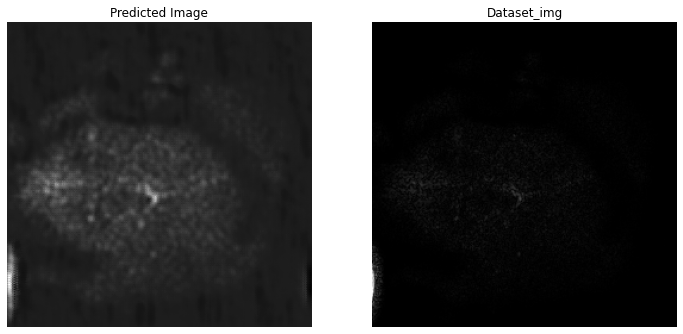

/content/testdata/IXI058-Guys-0726-T1.nii.gz
/content/testdata/IXI023-Guys-0699-T1.nii.gz


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


/content/testdata/IXI035-IOP-0873-T1.nii.gz


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


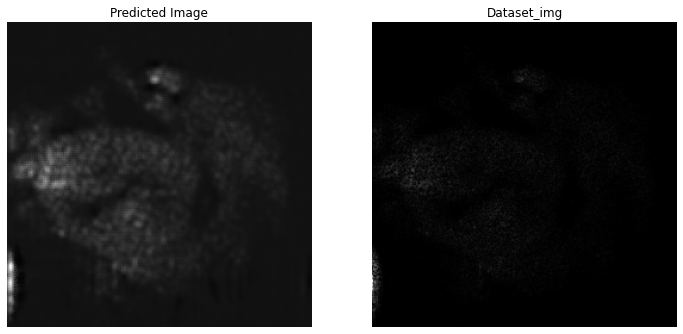

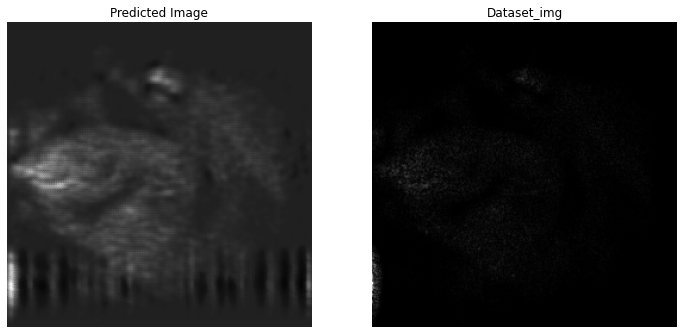

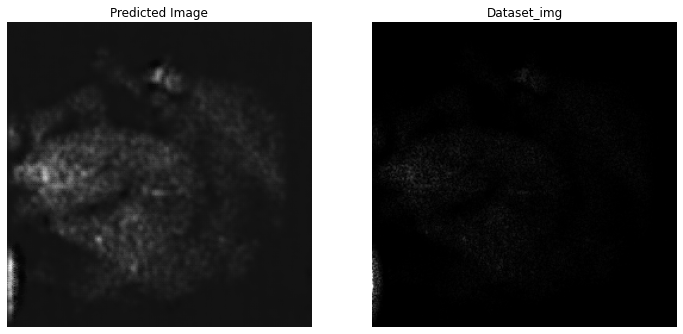

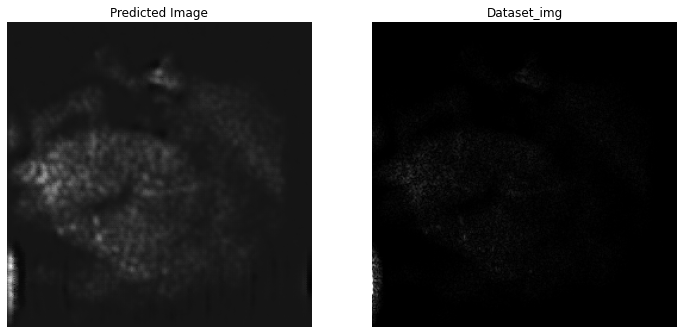

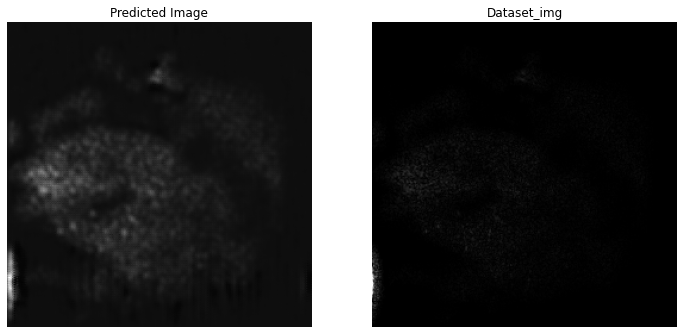

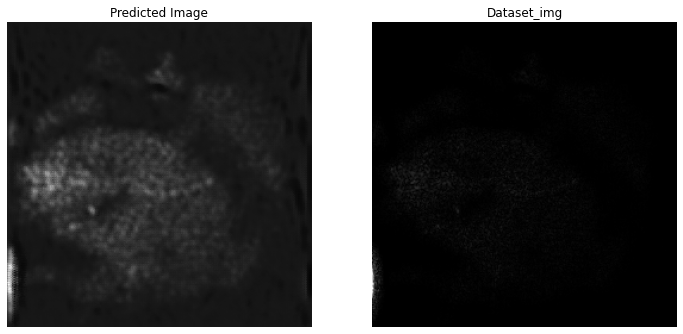

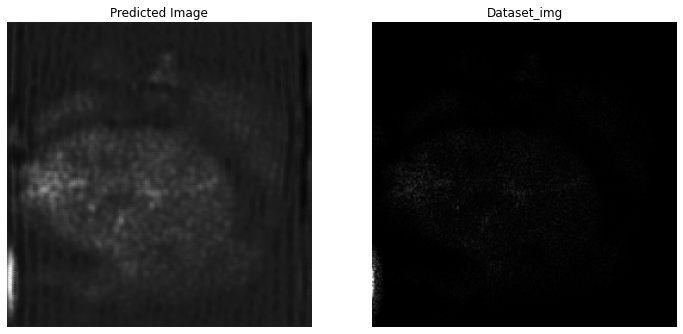

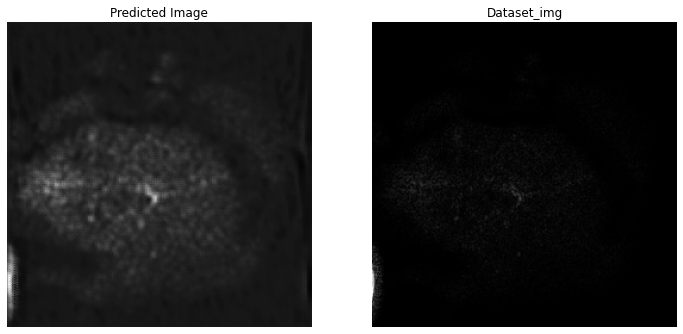

/content/testdata/IXI058-Guys-0726-T1.nii.gz


KeyboardInterrupt: ignored

In [0]:
features = []
labels = []
dataset = []
epochs = 10
g_model_AtoB = load_model('/content/model_GANs.h5')
files = glob.glob( "/content/testdata/*" )
for epoch in range(0 , epochs):
  start = time.time()


  for i in range(0 , len(files)):
    j = 0
    if (i%5 == 1):
      
      dataset.append(features)
      dataset.append(labels)
      for X, y in np.array(list(zip(np.array(features),np.array(labels)))):
        generate_test_images(g_model_AtoB,  X, y)
        if j == 50: 
          break 
        j+=1 
      
      
      del features, labels, dataset
      features = []
      labels = []
      dataset = []

    print(files[i])
    ds = nib.load(files[i])
    images = ds.get_data()
    total_slices = images.shape[2]
    for slices in range(0 , total_slices):
      label , feature = preprocess(images[:, : , slices], masks)
      labels.append(label)
      features.append(feature)